In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import constants

#Graphing variables
pagewidth = (8.5, 5)

In [3]:
#Function definitions

''' Plots the distributions of data as a histogram against the gaussian distribution with mean and stddev matching
    that of the data. 
'''
def plot_distribution(data, filename, title, figsize=pagewidth, bins='sturges', hrange=(-100, 100), 
                      directory='graphs/distributions/', logmode=False):
    plt.figure(figsize=figsize)
    if (hrange == (-100, 100)): hrange = (min(data), max(data))
    gspace = np.linspace(hrange[0], hrange[1], 1000)
    gnorm = norm.pdf(gspace, loc=np.mean(data), scale=np.std(data))
    if type(bins) is str: bins = len(np.histogram_bin_edges(data, bins=bins)) - 1
    gnorm *= 1000 * len(data) / (sum(gnorm) * bins)
    plt.plot(gspace, gnorm, color='orange', label='Normal Distribution')
    plt.hist(data, bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='ADC Distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Number of Samples')
    if logmode: plt.yscale('log')
    plt.title('Distribution of Data, with frequency '+title+', # bins='+str(bins))
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

''' Sums n adjacent samples together in list data and returns a new list of size len(data)/n. 
    n should be a factor of len(data).
'''
def sum_adjacent(data, n):
    return np.sum(data.reshape(int(len(data)/n), -1), axis=1)

In [212]:
%%time
#CPU times: user 380 ms, sys: 442 ms, total: 822 ms Wall time: 11.4 s
#CPU times: user 1.31 s, sys: 3.61 s, total: 4.91 sWall time: 40 s (just loading two sets)

#Load data, subtract mean
#Ended up being much faster this way then using an array

room_fm = np.fromfile('newdata/room_FM_100m.dat', dtype='int16')-2.**11 
print(room_fm)
room_fm += np.mean(room_fm)
print(room_fm)
dry_ice = np.fromfile('newdata/dry_ice.dat', dtype='int16')-2.**11 
dry_ice -= np.mean(dry_ice)

[ 26. -41. -29. ...  61.   1. -54.]
[ 20.21612542 -46.78387458 -34.78387458 ...  55.21612542  -4.78387458
 -59.78387458]
CPU times: user 662 ms, sys: 1.05 s, total: 1.71 s
Wall time: 12.3 s


In [5]:
#Title strings for graphing
filenames = ['room_UHF_100m', 'room_FM_100m', 'room_LTE_100m', 
             'boiling', #'boiling2', 'boiling3', 'boiling4',
             'ice', 'dry_ice', 'liquid_nitrogen']
titles = ['1GHz @21.9$^\circ$ C', '100MHz @21.9$^\circ$ C', '720MHz @21.9$^\circ$ C', 
          '1GHz @87.2$^\circ$ C', #'1GHz @77.1$^\circ$ C', '1GHz @61.8$^\circ$ C', '1GHz @56.6$^\circ$ C', 
          '1GHz @0.8$^\circ$ C', '1GHz @-78.5$^\circ$ C', '1GHz @-195.8$^\circ$ C']

CPU times: user 20.5 s, sys: 690 ms, total: 21.2 s
Wall time: 21.2 s


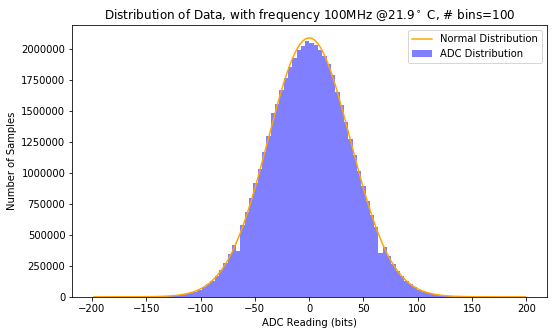

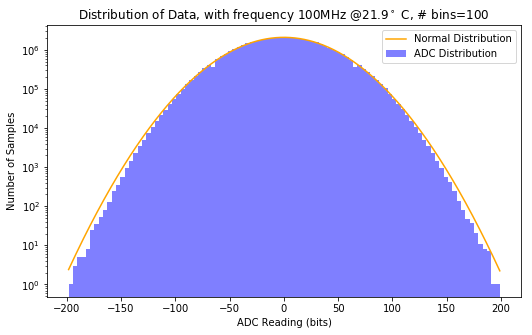

In [5]:
%%time
#CPU times: user 19.6 s, sys: 615 ms, total: 20.2 s Wall time: 19.8 s

#Distribution graphs
plot_distribution(room_fm[50000000:], filenames[1], titles[1], bins=100)
plot_distribution(room_fm[50000000:], filenames[1]+'log-y', titles[1], logmode=True, bins=100)

In [211]:
%%time
#CPU times: user 286 ms, sys: 240 ms, total: 525 ms Wall time: 525 ms

#Calculate power lists
constant = constants.epsilon_0 * constants.c / 2
power_fm = constant * room_fm**2
power_di = constant * dry_ice**2

KeyboardInterrupt: 

In [169]:
print(np.mean(power_fm))

1.9105463213128353


1.9105463213128353 6.983829530327163


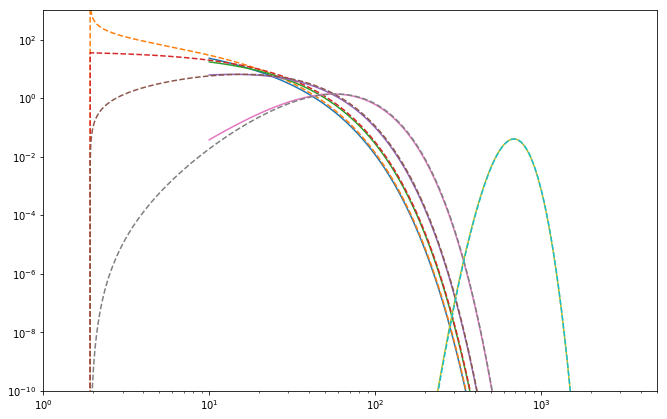

In [203]:
num = np.array([1, 2, 4, 10, 100])
cspace = np.linspace(0,5*10**3,1000000)
space = np.linspace(10**1,10**4,1000000)
mean = np.mean(power_fm)
var = np.var(power_fm)

print(mean, var)
plt.figure(figsize=(11,7))
for i in range(len(num)):
    plt.plot(space, 10**3/num[i] * chi2.pdf(space, num[i], loc=0, scale=var))
    plt.plot(cspace, 10**3/num[i] * chi2.pdf(cspace, num[i], loc=mean, scale=var), linestyle='dashed')
plt.xscale('log')
plt.yscale('log')
plt.xlim((10**0, 5*10**3))
plt.ylim((10**(-10), 10**3))
plt.show()

check0
check1
check2
check3
check4
CPU times: user 35.3 s, sys: 941 ms, total: 36.2 s
Wall time: 36 s


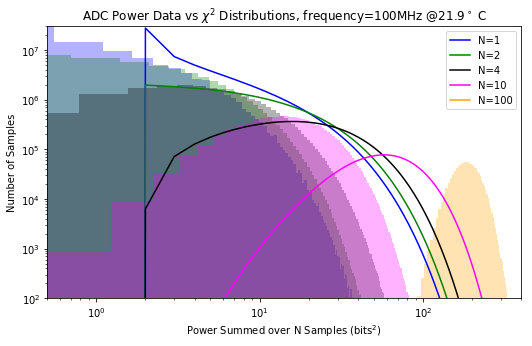

In [208]:
%%time
#CPU times: user 43.2 s, sys: 5.98 s, total: 49.2 s Wall time: 1min 12s

#CPU times: user 39.5 s, sys: 1.53 s, total: 41 s Wall time: 41.7 s
#CPU times: user 1min 1s, sys: 5.79 s, total: 1min 7s Wall time: 1min 35s with norm
#CPU times: user 59.1 s, sys: 2.91 s, total: 1min 1s Wall time: 1min 16s with multiplied by norm
#CPU times: user 54.7 s, sys: 6.83 s, total: 1min 1s Wall time: 2min 25s
#CPU times: user 1min 45s, sys: 8.3 s, total: 1min 54s Wall time: 2min 51s for two graphs

def plot_chi2(power, filename, title, bins=200, samples=100000, directory='graphs/chi2/'):
    num = np.array([1, 2, 4, 10, 100])
    colours = ['blue', 'green', 'black', 'magenta', 'orange']
    plt.figure(figsize=pagewidth)
    plist, cspace, clist = [], [], []
    space = np.linspace(0,10**5,samples)
    mean, var = np.mean(power), np.var(power)
    rangep = max(power) - min(power)
    length, sump = len(power), sum(power)
    for i in range(len(num)): 
        plist.append(sum_adjacent(power, num[i]))
        #cspace.append(np.linspace(0,10**5, samples))
        #cnorm = samples * length /(sump * num_bins)
        #cnorm = len(plist[i]) * (max(plist[i]) - min(plist[i])) / bins
        cnorm = len(plist[i]) * rangep / bins
        clist.append(cnorm * chi2.pdf(space, num[i], loc=mean, scale=var))
        print('check'+str(i))
    for i in range(len(plist)): 
        plt.hist(plist[i], bins=bins, color=colours[i], alpha=0.3)
        plt.plot(space, clist[i], color=colours[i], label='N='+str(num[i]))
    plt.xlabel('Power Summed over N Samples (bits$^2$)')
    plt.ylabel('Number of Samples')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim((5*10**(-1), 4*10**2))
    plt.ylim((10**2, 3*10**7))
    plt.title('ADC Power Data vs $\chi^2$ Distributions, frequency='+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

plot_chi2(power_fm, filenames[1], titles[1])
#plot_chi2(power_di, filenames[5], titles[5])

mean 1910.5463213128291
std 140.9565413332815
time 20
bandwidth 2e-15
ratio 0.0001414213562373095
ratio observed 0.07377813338565035
CPU times: user 1.17 s, sys: 85.2 ms, total: 1.25 s
Wall time: 1.01 s


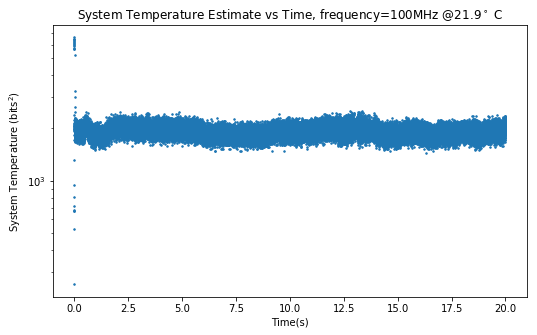

In [125]:
%%time
#CPU times: user 2.34 s, sys: 196 ms, total: 2.54 s Wall time: 2.13 s

temp_fm = sum_adjacent(power_fm,1000)
temp_di = sum_adjacent(power_di,1000)

def plot_temp(temp, filename, title, directory='graphs/temperatures/'):
    plt.figure(figsize=pagewidth)
    plt.scatter(np.linspace(0,20,len(temp)), temp , s=1.5**2)
    plt.xlabel('Time(s)')
    plt.ylabel('System Temperature (bits$^2$)')
    plt.yscale('log')
    plt.title('System Temperature Estimate vs Time, frequency='+title)
    plt.savefig(directory+filename+'.png', bbox_inches='tight')
    
plot_temp(temp_fm, filenames[1], titles[1])
#plot_temp(temp_di, filenames[5], titles[5])

cadence = 1/(5*10**6)
print('mean',np.mean(temp_fm))
print('std',np.std(temp_fm))
print('time',20)
print('bandwidth',1/(500*10**12))
print('ratio',1/np.sqrt(20*1/(2*cadence)))
print('ratio observed',np.std(temp_fm)/np.mean(temp_fm))

In [167]:
%%time

def find_power2(n):
    i = 0
    while (2**i < n): i += 1
    return 2**(i-1)

def plot_spectrum(data, filename, title, directory='graphs/spectrums/', plot_error=False, u=None, averages=None):
    #if averages: data = sum_adjacent(data, averages)/averages
    transform = np.fft.fft(data[int(len(data) - find_power2(len(data))):].reshape(-1,1024), axis=1)
    t_power = (transform.real**2 + transform.imag**2).sum(axis=0)
    if averages: t_power = sum_adjacent(t_power, averages)/averages
    plt.figure(figsize=pagewidth)
    half_len = int(len(t_power)/(2))
    if plot_error: plt.errorbar(np.arange(half_len)+100*10**6, 10*np.log10(t_power[:half_len]), yerr=u, 
                                elinewidth=1.0, capthick=1.0, capsize=2.0, fmt='none')
    else: plt.scatter(np.arange(half_len),10*np.log10(t_power[:half_len]), s=1.5**2)
    plt.xlabel('Frequency Bin')
    plt.ylabel('Power (dB arb)')
    plt.title('Spectrum from AirSpy, frequency='+title)
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

mean = np.mean(temp_fm)
ratio = 1/np.sqrt(20*1/(2*cadence))

print(len(room_fm)/(2/0.01**2))

plot_spectrum(room_fm, filenames[1], titles[1], plot_error=False, u=np.std(temp_fm)/np.mean(temp_fm), averages=5000)
#plot_spectrum(room_fm, filenames[1], titles[1], plot_error=True, u=1.1)
#plot_spectrum(dry_ice, filenames[1], titles[1], plot_error=True, u=1.1)

5000.0


ValueError: cannot reshape array of size 1024 into shape (0,newaxis)